# Computational Methods in Economics

## Lecture 2 - Solving Systems of Linear Equations

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-08-16 10:41:19.971500


### Preliminaries

#### Import Modules

In [2]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import numpy as np
import scipy.optimize
import scipy.linalg


# import sys
from importlib import reload

### Review: Matrices

Let $A$ be a m-by-n matrix:
\begin{split}A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    a_{m1} & a_{m2} & \cdots & a_{mn}
\end{array}
\right]\end{split}

A n-by-n matrix is called a *square* matrix of order $n$:
\begin{split}A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{array}
\right]\end{split}

A matrix $D$ of order $n$ is *diagonal* if all its non-zero elements are on its diagonal (i.e. the entries $a_{ij}$ with $i = j$):
\begin{split}D =
\left[
\begin{array}{cccc}
    a_{11} & 0 & \cdots & 0 \\
    0 & a_{22} & \cdots & 0 \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]\end{split}

A matrix $L$ of order $n$ is *lower triangular* if all its non-zero elements are either diagonal entries or *strictly lower triangular* entries (i.e. the entries $a_{ij}$ for which $i > j$):
\begin{split}L =
\left[
\begin{array}{cccc}
    a_{11} & 0 & \cdots & 0 \\
    a_{21} & a_{22} & \cdots & 0 \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{array}
\right]\end{split}

A matrix $U$ of order $n$ is *upper triangular* if all its non-zero elements are either diagonal entries or *strictly upper triangular* entries (i.e. the entries $a_{ij}$ for which $i < j$):
\begin{split}U =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    0 & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]\end{split}

#### Matrices in Python

In Python, matrices are best coded as *Numpy arrays*:

In [3]:
## define matrix
A = np.array([[2, 0, -1, 2],
              [4, 2, -1, 4],
              [2, -2, -2, 3],
              [-2, 2, 7, -3]])
print(A)


## get dimension of matrix
print( A.shape )

## access elements by indices
print(A[2,1])
print(A[3,2])

## transpose matrix
print(A.T)

[[ 2  0 -1  2]
 [ 4  2 -1  4]
 [ 2 -2 -2  3]
 [-2  2  7 -3]]
(4, 4)
-2
7
[[ 2  4  2 -2]
 [ 0  2 -2  2]
 [-1 -1 -2  7]
 [ 2  4  3 -3]]


The Scipy package **linalg** has some useful functions, including the determinant and the inverse:

In [4]:
## compute the determinant of a matrix
print( np.linalg.det(A) )

## compute the inverse of a matrix
print( np.linalg.inv(A) )

## compute the rank of a matrix
print( np.linalg.matrix_rank(A) )
print( np.linalg.matrix_rank(A.T) )

-20.0
[[ 3.5 -1.  -0.9  0.1]
 [-1.   0.5 -0.1 -0.1]
 [ 0.   0.   0.2  0.2]
 [-3.   1.   1.  -0. ]]
4
4


Matrix addition and scalar multiplication are straightforward. Matrix multiplication is implemented using **@**:

In [5]:
## scalar multiplication
B = 3 * A
print(B)
## matrix addition
print( A + B)

[[ 6  0 -3  6]
 [12  6 -3 12]
 [ 6 -6 -6  9]
 [-6  6 21 -9]]
[[  8   0  -4   8]
 [ 16   8  -4  16]
 [  8  -8  -8  12]
 [ -8   8  28 -12]]


In [6]:
## matrix multiplication
print( A @ B )

## with identity matrix

print( np.eye(4) @ A )

[[  -6   18   42  -15]
 [  18   42   72    3]
 [ -42   18   75  -57]
 [  72  -48 -105  102]]
[[ 2.  0. -1.  2.]
 [ 4.  2. -1.  4.]
 [ 2. -2. -2.  3.]
 [-2.  2.  7. -3.]]


When multiplying a matrix and a vector, make sure that the vector has the right dimension -"flat" arrays work either way!

In [7]:
x = np.array([1, 2, 3, 4])
print(A @ x)
print(x @ A)

## "row vector" (1-by-4)
x = np.array([[1, 2, 3, 4]])
print(x @ A) 
# print(A @ x) # this one won't work!

## "column vector" (4-by-1)
x = np.array([[1], [2], [3], [4]])
print(A @ x) 
# print(x @ A) # this one won't work!


[ 7 21  4 11]
[ 8  6 19  7]
[[ 8  6 19  7]]
[[ 7]
 [21]
 [ 4]
 [11]]


### Review: Nonsingular vs. singular matrix

As you hopefully recall from your linear algebra class, an important feature of a square matrix is whether or not it is *invertible*. An invertible matrix is also called *non-singular*, while a *singular* matrix cannot be inverted. 

In [8]:
A = np.array([[1, 1],
              [2, 1]])

print(np.linalg.det(A))
print(np.linalg.matrix_rank(A))

-1.0
2


In [12]:
X = np.array([[0, 1],
              [0, 2]])

print(np.linalg.det(X))
print(np.linalg.matrix_rank(X))
print(np.linalg.matrix_rank(X.T))

0.0
1
1


In [10]:
A = np.array([[1, 0, 0],
              [4, 0, 0],
              [2, 3, 5]])

np.linalg.det(A)

0.0

### System of Linear Equations

A system of $m$ linear equations in $n$ unknowns $x_1, x_2, ... , x_n$ is written as:
\begin{split}
    \begin{array}{c}
    a_{11} x_1 + \cdots + a_{1n} x_n = b_1\\
    \vdots \\
    a_{m1} x_1 + \cdots + a_{mn} x_n = b_n
\end{array}
\end{split}
Let $x$ be a n-by-1 vector: $x = [x_1, x_2, ... , x_n]'$. Then, the system can be written in matrix form as $Ax = b$, since
\begin{equation}
\begin{split}A x
=
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1n} \\
    \vdots & \vdots  & \vdots \\
    a_{m1} &  \cdots & a_{mn}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{n}
\end{array}
\right] 
&=
\left[
\begin{array}{c}
    a_{11} x_1 + \cdots + a_{1n} x_n \\
    \vdots \\
    a_{m1} x_1 + \cdots + a_{mn} x_n
\end{array}
\right] \\
&=
\left[
\begin{array}{c}
    a_{11} \\
    \vdots \\
    a_{m1} 
\end{array}
\right] x_1 +
...
+ \left[
\begin{array}{c}
    a_{1n}  \\
    \vdots \\
    a_{mn} 
\end{array}
\right] x_n
 = 
\left[
\begin{array}{c}
    b_{1}  \\
    \vdots \\
    b_{m} 
\end{array}
\right]
\end{split}
\end{equation} 




[ 1.  2.]


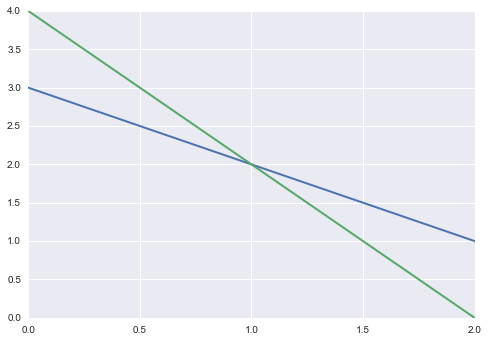

In [11]:
A = np.array([[1, 1],
              [2, 1]])
b = np.array([3, 4])

print(np.linalg.solve(A, b))

f1 =  lambda x: 3 - x
f2 =  lambda x: 4 - 2 * x
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots()
ax.plot(x, f1(x) , linewidth= 2)
ax.plot(x, f2(x) , linewidth= 2)

In [13]:
A = np.array([[0, 1],
              [0, 2]])
b = np.array([3, 4])

print(np.linalg.det(A))
# print(np.linalg.solve(A, b))

# ##### How to show this graphically?
# f1 =  lambda x: 3 
# f2 =  lambda x: 4 / 2
# x = np.linspace(0, 2, 100)
# fig, ax = plt.subplots()
# ax.plot(x, f1(x) , linewidth= 2)
# ax.plot(x, f2(x) , linewidth= 2)


0.0


### Solving Triangular Linear Systems

#### Forward substitution

In [19]:
def forward_sub(A, b):
    """
    Implements the forward substitution algorithm to solve a lower triangular system of equations
    """
    n, m = A.shape
    
    assert n == m, "A must be a square matrix"
    
    x = np.zeros(n)
    
    for i in range(n):
        
        summ = 0
        for j in range(i):
            summ += A[i, j] * x[j]
        
        x[i] = (b[i] - summ) / A[i, i]   
    
    return x

A = np.array([[1, 0, 0],
              [4, 5, 0],
              [7, 8, 9]])

b = np.array([1, 2, 3]) 

x = forward_sub(A, b)
x

array([ 1.        , -0.4       , -0.08888889])

#### Backward substitution

### Gaussian Elimination

Let $L$ denote a *lower triangular* square matrix:
\begin{split}L =
\left[
\begin{array}{ccccc}
    a_{11} & 0 & 0 & \cdots & 0 \\
    a_{21} & a_{22} & 0 & \cdots & 0 \\
    \vdots & \vdots & \vdots & & \vdots \\
    a_{n1} & a_{n2} & a_{n3} &\cdots & a_{nn}
\end{array}
\right]\end{split}
Similarly, let $U$ denote an *upper triangular* square matrix:
\begin{split}U =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    0 & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]\end{split}

Gaussian elimination is an algorithm to decompose any square matrix into the form 
\begin{split}
 A = LU,
\end{split}
where $L$ is 

#### Simple Example

As an example, consider a market where the inverse supply function is given by 
\begin{align}
    p^s = c + d q,
\end{align}
and the inverse demand function is given by
\begin{align}
    p^d = a - b q.
\end{align}
In equilibrium, $p^d = p^d = p$, and solving for $q$ gives 
\begin{align}
    q = \frac{a + c}{b - d}.
\end{align}

Note that we can write the market in equilibrium as a system of two linear equations in two unknowns:
\begin{align}
    p + b q &= a \\
    p - d q &= c
\end{align}
or
\begin{split}
\left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\left[
\begin{array}{c}
    p \\
    q \\
\end{array}
\right]
=
\left[
\begin{array}{c}
    a \\
    c \\
\end{array}
\right]
\end{split}
Let 
\begin{split}
A \equiv \left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\end{split}
and recall that $ A = IA$, where $I$ is the identity matrix:
\begin{split}
A = \left[
\begin{array}{cc}
    1 & 0 \\
    0 & 1 \\
\end{array}
\right] \left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\end{split}

The idea of Gaussian elimination is to start with this expression and then go through each column of $A$, transforming it such that the elements below the diagonal are zero. In this simple example, there is only one step: we need to transform the first column of $A$. We can do this by subtracting $1$ times the first row from the second row, which gives us an upper triangular matrix $U$:
\begin{split}
 U = \left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right]
\end{split}

In order to keep the equality above, we update the identity matrix by the coefficient $1$:
\begin{split}
A = \left[
\begin{array}{cc}
    1 & 0 \\
    1 & 1 \\
\end{array}
\right] \left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right] \equiv LU
\end{split}
It is easy to verify that the equality still holds.


This was a very easy example for Gaussian elimination. A more complicated example for a 4-by-4 matrix can be found in M&F, ch. 1.

### LU Factorization

#### Simple Example Continued

Why is it useful to write $A$ as $LU$, and hence what is the use of Gaussian elimination? Going back to our system of linear equations, let's make the following substitutions:
\begin{equation}
Ax = LUx = L(Ux) = Ly = b
\end{equation}
As we will see, this is easy to solve. Start with $Ly = b$. In our example above:
\begin{split}
\left[
\begin{array}{cc}
    1 & 0 \\
    1 & 1 \\
\end{array}
\right] \left[
\begin{array}{c}
    y_1 \\
    y_2 \\
\end{array}
\right] = 
\left[
\begin{array}{c}
    a \\
    c \\
\end{array}
\right]
\end{split}
From this, it is easy to see that $y_1 = a$ and
\begin{split}
    y_1 + y_2 = c\ \Rightarrow\ y_2 = c - a.
\end{split}

Hence, we have a solution for $y$ above. Recall that we had defined $Ux = y$ or
\begin{equation}
 \begin{split}
\left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right] \left[
\begin{array}{c}
    p \\
    q \\
\end{array}
\right] = 
\left[
\begin{array}{c}
    y_1 \\
    y_2 \\
\end{array}
\right] =
\left[
\begin{array}{c}
    a \\
    c - a \\
\end{array}
\right]
\end{split}
\end{equation}

From this, it follows that
\begin{split}
q  (- d - b) = c - a
\end{split}
and
\begin{split}
p + bq = a.
\end{split}
Rearranging gives the solution
\begin{split}
q  = \frac{a - c}{b + d}, \ p = a - b \frac{a - c}{b + d}.
\end{split}


### Gaussian Elimination with Pivoting

TBA

### PA = LU Factorization

TBA (example notes)


#### In Python

Example Script p. 65

In [5]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])

pl, u = scipy.linalg.lu(A, permute_l=True)
b = np.array([1, 1, 1]) 
pl, u

(array([[ 0.14285714,  1.        ,  0.        ],
        [ 0.57142857,  0.5       ,  1.        ],
        [ 1.        ,  0.        ,  0.        ]]),
 array([[ 7.        ,  8.        ,  9.        ],
        [ 0.        ,  0.85714286,  2.71428571],
        [ 0.        ,  0.        , -0.5       ]]))

In [12]:
pl @ u

array([[ 1.,  2.,  4.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])

In [14]:
Q = np.linalg.inv([[0, 0, 1],
              [1, 0, 0],
              [0, 1, 0]])

In [15]:
L = np.array([[ 1.        ,  0.        ,  0.        ],
            [ 0.14285714,  1.        ,  0.        ],
            [ 0.57142857,  0.5       ,  1.        ]
        ]) 

In [16]:
Q @ L  - pl

array([[ -2.85714286e-09,   0.00000000e+00,   0.00000000e+00],
       [ -1.42857137e-09,  -2.22044605e-16,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [17]:
Q

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]])

### Solving a system of linear equations in Python

In [31]:
a, b, c, d = 5, 0.4, 0, 0.3

A = np.array([[1, b], [1, -d]])
x = np.array([[a], [c]])

np.linalg.solve(A, x)

array([[ 2.14285714],
       [ 7.14285714]])

In [33]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([1, 2, 3]) 

np.linalg.solve(A, b)

array([ -3.33333333e-01,   6.66666667e-01,   3.17206578e-17])

In [20]:
A = np.array([[2, 0, -1, 2, 1],
              [4, 2, -1, 4, 2],
              [2, -2, -2, 3, 3],
              [-2, 2, 7, -3, 4],
              [3, 4, 5, 6, 7]])

b = np.array([1, 2, 3, 4, 5]) 

In [21]:
%timeit -n3 np.linalg.solve(A, b)

The slowest run took 4.16 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 31.6 µs per loop


In [22]:
%timeit -n3 scipy.linalg.solve(A, b)

The slowest run took 14.14 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 59.5 µs per loop


In [23]:
%timeit -n3 np.linalg.inv(A) @ b

The slowest run took 14.00 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 56.7 µs per loop


In [40]:
x = 256
y = 256

print( id(x) )
print( id(y) )

4392110592
4392110592


In [41]:
type(1)

int

In [42]:
type(250)

int

In [137]:
import sys
sys.getsizeof(0.1)

24

In [52]:
bin(257)

'0b100000001'

In [53]:
(1e-20 + 1) - 1

0.0

In [55]:
1e-20 + (1 - 1)

1e-20

In [97]:
format(0.1, '.20f')

'0.10000000000000000555'

In [60]:
np.float64(0.1).view(np.int64)

4591870180066957722

In [138]:
f, d = (0.1).as_integer_ratio()
e = int( np.log(d)/np.log(2) )
format(f / 2**e, '.20f')
f, e

(3602879701896397, 55)

In [139]:
f, d = (-3210.48).as_integer_ratio()
e = int( np.log(d)/np.log(2) )
format(f / 2**e, '.20f')

'-3210.48000000000001818989'

In [141]:
type(e)

int

More information:
https://docs.python.org/3/tutorial/floatingpoint.html
https://stackoverflow.com/questions/4838994/float-to-binary

In [85]:
f, d = (1e-20).as_integer_ratio()
e = int( math.log(d)/math.log(2) )
format(f / 2**e, '.20f')
print(f, e)

6646139978924579 119


In [92]:
len(bin(f))

55

In [91]:
bin(e)

'0b1110111'

In [96]:
bin(f)

'0b10111100111001010000100001100100100100100001000100011'

In [130]:
def float_to_bin(x):
    if x == 0:
        return "0" * 64
    w, sign = (float.hex(x), 0) if x > 0 else (float.hex(x)[1:], 1)
    mantissa, exp = int(w[4:17], 16), int(w[18:])
    print((mantissa / 2**52 + 1) * 2**exp)
    return "{}{:011b}{:052b}".format(sign, exp + 1023, mantissa)

float_to_bin(-3210.48)

3210.48


'1100000010101001000101001111010111000010100011110101110000101001'

In [104]:
f, d = (-3210.48).as_integer_ratio()
e = int( np.log(d)/np.log(2) )
format(f / 2**e, '.20f')
# print( bin(e) + bin(f))

'-3210.48000000000001818989'

In [106]:
bin(f)

'-0b11001000101001111010111000010100011110101110000101001'

In [110]:
format(bin(1), 'f')

ValueError: Unknown format code 'f' for object of type 'str'

In [132]:
len(bin(f)[3:])

53

In [135]:
bin(e)[2:]

'101001'

In [136]:
f

-7059920181484585